In [8]:
import pandas as pd
import calendar

df = pd.read_csv('data.csv')




Eliminando atributos

In [9]:
del df['description']
del df['title']
del df['price_period']
del df['l6']
del df['l5']
del df['id']

Discriminando data

In [10]:
df = df.loc[df['l2'] == 'Capital Federal']
df = df.loc[df['operation_type'] == 'Venta']
df = df.loc[df['property_type'] == 'Departamento']
df = df.loc[df['currency'] == 'USD']
df.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
43,Propiedad,2020-12-26,9999-12-31,2020-12-26,-34.643163,-58.494823,Argentina,Capital Federal,Villa Luro,NaN,2.0,NaN,1.0,NaN,NaN,100000.0,USD,Departamento,Venta
68,Propiedad,2020-12-26,9999-12-31,2020-12-26,-34.579185,-58.434970,Argentina,Capital Federal,Palermo,Palermo Hollywood,NaN,NaN,1.0,33.0,29.0,105000.0,USD,Departamento,Venta
69,Propiedad,2020-12-26,2021-02-11,2020-12-26,-34.556279,-58.462507,Argentina,Capital Federal,Belgrano,NaN,1.0,NaN,1.0,40.0,NaN,110000.0,USD,Departamento,Venta
72,Propiedad,2020-12-26,2020-12-29,2020-12-26,-34.592565,-58.445352,Argentina,Capital Federal,Villa Crespo,NaN,1.0,NaN,1.0,27.0,25.0,84900.0,USD,Departamento,Venta
75,Propiedad,2020-12-26,2021-04-10,2020-12-26,-34.606791,-58.469843,Argentina,Capital Federal,Villa General Mitre,NaN,NaN,NaN,1.0,27.0,24.0,68000.0,USD,Departamento,Venta


Transform & clean

In [11]:
def divide_by_one_thounsans(x):
    return x / 1000


df['created_on'] = pd.to_datetime(df['created_on'])
df['surface_total'].fillna((df['surface_total'].mean()), inplace=True)
df['surface_covered'].fillna((df['surface_covered'].mean()), inplace=True)
df['bedrooms'].fillna((df['bedrooms'].mean()), inplace=True)
df['rooms'].fillna((df['rooms'].mean()), inplace=True)
df['price'] = df['price'].apply(divide_by_one_thounsans)


<AxesSubplot:>

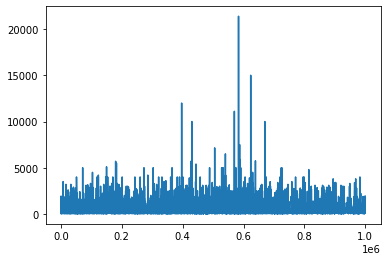

In [12]:
df['price'].plot()

<AxesSubplot:>

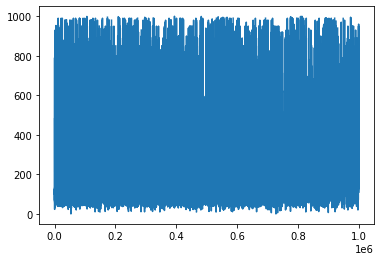

In [15]:
df['price'] = df['price'].loc[df['price'] < 1000]
df['price'].plot()

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

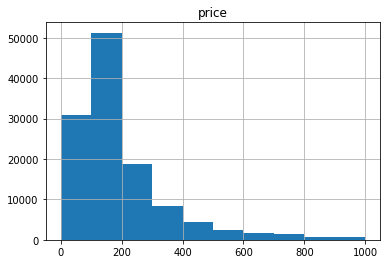

In [16]:
df.hist(column='price')